In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

In [ ]:
# For sdp_algorithm

# %pip install cmake
# %pip install ecos==2.0.5
# %pip install cvxpy

In [ ]:
from starter import *
from greedy_algorithm import *
from k_cut_algorithm import *
import random

In [ ]:
import importlib
import starter
import greedy_algorithm
import k_cut_algorithm
importlib.reload(starter)
importlib.reload(greedy_algorithm)
importlib.reload(k_cut_algorithm)
from starter import *
from greedy_algorithm import *
from k_cut_algorithm import *

In [ ]:
#import sdp_algorithm
#importlib.reload(sdp_algorithm)
#from sdp_algorithm import *

# Phase 1 - Create Inputs

In [ ]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

# Phase 2 - Implement your Solver

In [ ]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(5, 10)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [ ]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [ ]:
def solve(G: nx.Graph):
    
    # TODO: Simulated Annealing
        # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
        # TODO: Decrease the amount of nodes updated as time goes on
        # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    G = max_k_cut_solve(k)(G)

  0%|          | 0/19 [00:00<?, ?it/s]

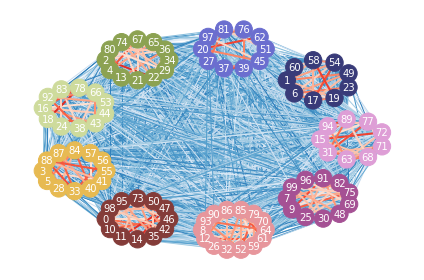

greedy_algorithm 88563.22862783638


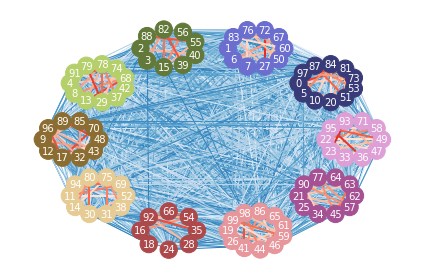

current_solve_helper 70079.55792167092


In [381]:
# TODO: Write a function that fetches a random input to test on

import greedy_algorithm
importlib.reload(greedy_algorithm)
from greedy_algorithm import *


input = 'inputs/small54.in'

solvers = [greedy_algorithm, current_solve(input)]

for solver in solvers:
    G = read_input(input)

    k = solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))

In [343]:
run(greedy_algorithm, 'inputs/large48.in', 'outputs/large48.out')

  0%|          | 0/64 [00:00<?, ?it/s]

inputs/large48.in: cost 5039721.87212707


In [385]:
# TODO: Write a function that can separate which inputs to run, given a class (small, medium, large) and range of numbers

for _ in range(10):
    run_all(greedy_algorithm, 'inputs', 'outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large225.in: cost 73054.17397775385


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small232.in: cost 30978.694042841445


  0%|          | 0/171 [00:00<?, ?it/s]

inputs/large116.in: cost 313273.17397775385


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large59.in: cost 451679.6647359324


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small150.in: cost 126318.3711102245


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large147.in: cost 844219.1038855641


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small101.in: cost 167947.14243574018


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small197.in: cost 128093.27302561837


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small206.in: cost 18731.860879206775


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large240.in: cost 549142.446452239


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium7.in: cost 1206882.2965546043


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small257.in: cost 241969.01581064696


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large180.in: cost 989594.4996984345


  0%|          | 0/197 [00:00<?, ?it/s]

inputs/large211.in: cost 1973091.7022034856


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small135.in: cost 185604.1881231363


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small68.in: cost 256877.30536840725


  0%|          | 0/61 [00:00<?, ?it/s]

inputs/medium249.in: cost 22300.5631171958


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large173.in: cost 93462.22772669516


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small164.in: cost 140351.04010302282


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium218.in: cost 28449.939912785758


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium189.in: cost 120884.8734434387


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small39.in: cost 17092.804087203473


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large122.in: cost 208272.8281828459


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium84.in: cost 172902.676615645


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium26.in: cost 778835.772930794


  0%|          | 0/43 [00:00<?, ?it/s]

inputs/medium77.in: cost 159838.84334853874


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium43.in: cost 274007.47604723077


  0%|          | 0/48 [00:00<?, ?it/s]

inputs/medium12.in: cost 1136907.5631171959


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium53.in: cost 131272.8281828459


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium67.in: cost 1277301.2998200553


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium36.in: cost 353781.56803034386


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium94.in: cost 748449.5598517449


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large132.in: cost 1936940.769561812


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small174.in: cost 131551.11558162372


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small29.in: cost 193067.90918776827


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium199.in: cost 562847.8600055852


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium208.in: cost 185726.7629100352


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large163.in: cost 1740998.6837745795


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small125.in: cost 66315.53919607958


  0%|          | 0/63 [00:00<?, ?it/s]

inputs/medium259.in: cost 668857.299820055


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small78.in: cost 225850.7311602446


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large201.in: cost 792036.1739777538


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large190.in: cost 3125523.9322435693


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small247.in: cost 15118.725422140831


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large250.in: cost 887969.4772052544


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small216.in: cost 144451.30536840725


  0%|          | 0/24 [00:00<?, ?it/s]

inputs/small187.in: cost 174694.27302561837


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small111.in: cost 191586.90918776827


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large157.in: cost 1042226.0471329268


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large18.in: cost 2008736.9322435693


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small140.in: cost 103226.95319499001


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large49.in: cost 946652.9850467616


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large106.in: cost 79225.93224356924


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small222.in: cost 408346.01581064693


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large235.in: cost 499272.8281828459


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small253.in: cost 131505.90918776827


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium3.in: cost 862010.4884195081


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large215.in: cost 426087.4518181766


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large184.in: cost 649272.828182846


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small202.in: cost 291364.01581064693


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small193.in: cost 102235.74944065648


  0%|          | 0/196 [00:00<?, ?it/s]

inputs/large244.in: cost 50239.63804197524


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small160.in: cost 52006.41405005809


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large126.in: cost 125427.93224356924


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large69.in: cost 85272.8281828459


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small131.in: cost 79122.30459603718


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large38.in: cost 651968.4498441875


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large177.in: cost 301794.17397775385


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small236.in: cost 22599.403002977084


  0%|          | 0/168 [00:00<?, ?it/s]

inputs/large221.in: cost 589297.462732319


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large143.in: cost 12484.227726695159


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small58.in: cost 134572.70548433642


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small105.in: cost 368347.4159265761


  0%|          | 0/204 [00:00<?, ?it/s]

inputs/large112.in: cost 1814863.1739777538


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium228.in: cost 127059.45523630823


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small154.in: cost 113219.24939607034


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium16.in: cost 213793.60374212297


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium47.in: cost 726450.5631171959


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium80.in: cost 881330.4109184471


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium73.in: cost 561114.6403407814


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium22.in: cost 165932.0347243824


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium32.in: cost 1973879.337169042


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium63.in: cost 343573.8281828459


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium90.in: cost 360449.1689070338


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium57.in: cost 132283.3827003505


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small19.in: cost 280136.01581064693


  0%|          | 0/67 [00:00<?, ?it/s]

inputs/medium238.in: cost 59730.24214450672


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small144.in: cost 267623.01581064693


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large102.in: cost 882322.3977516853


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small48.in: cost 162339.49323151432


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small115.in: cost 68420.94049462173


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large153.in: cost 359342.6789662113


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large231.in: cost 449.2277266951576


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small226.in: cost 129472.2696434318


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large260.in: cost 2715568.265638046


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large167.in: cost 1979638.519281397


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large28.in: cost 416385.0471329267


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small121.in: cost 48043.55556173267


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large79.in: cost 1118789.3693014937


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large136.in: cost 102388.8281828459


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small170.in: cost 130410.20038610406


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large254.in: cost 946080.9310456741


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small183.in: cost 12116.154672227438


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small212.in: cost 289917.01581064693


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large194.in: cost 216682.8281828459


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large205.in: cost 1808308.1739777538


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small243.in: cost 126529.7738008533


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium2.in: cost 1085634.7923677082


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small252.in: cost 179413.2880614206


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large185.in: cost 975583.7695618122


  0%|          | 0/171 [00:00<?, ?it/s]

inputs/large214.in: cost 2822374.3140221452


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small192.in: cost 299378.8281828459


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small203.in: cost 402517.3688118974


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large245.in: cost 149018.8281828459


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small161.in: cost 56863.19348339698


  0%|          | 0/167 [00:00<?, ?it/s]

inputs/large68.in: cost 333021.0471329267


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large127.in: cost 283400.63934678014


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small130.in: cost 139322.01479471236


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large176.in: cost 362571.17397775385


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large39.in: cost 77542.04713292672


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small237.in: cost 150571.48951581027


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large220.in: cost 1790518.9322435693


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large142.in: cost 3837389.815063163


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small104.in: cost 92066.17750264333


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small59.in: cost 402517.3688118974


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large113.in: cost 16205.227726695159


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small155.in: cost 61134.0883757614


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium229.in: cost 114727.76291003522


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium17.in: cost 698016.1476213062


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium46.in: cost 38465.59098121423


  0%|          | 0/68 [00:00<?, ?it/s]

inputs/medium81.in: cost 200993.60374212297


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium72.in: cost 51040.563117195794


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium23.in: cost 106200.5598517449


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium33.in: cost 1504740.9970749142


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium62.in: cost 1251185.599303701


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium91.in: cost 154665.21912755698


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium56.in: cost 536093.1189402738


  0%|          | 0/26 [00:00<?, ?it/s]

inputs/small145.in: cost 31587.694042841445


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium239.in: cost 65865.9011493336


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small18.in: cost 69101.85383914743


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large103.in: cost 939650.1739777538


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small114.in: cost 394464.01581064693


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small49.in: cost 126784.49323151434


  0%|          | 0/165 [00:00<?, ?it/s]

inputs/large152.in: cost 249230.04713292673


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large230.in: cost 56216.82818284591


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small227.in: cost 180046.90918776827


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large29.in: cost 1006551.9850467616


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large166.in: cost 652148.041807186


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small120.in: cost 402517.3688118974


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large137.in: cost 885532.5192813973


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large78.in: cost 123592.8281828459


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small171.in: cost 236109.11077538342


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large255.in: cost 1128381.519281397


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small213.in: cost 184707.90918776827


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small182.in: cost 218750.48951581027


  0%|          | 0/198 [00:00<?, ?it/s]

inputs/large204.in: cost 16233.828182845904


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large195.in: cost 1767454.0359012699


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small242.in: cost 184952.27302561837


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large224.in: cost 238527.8347683047


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small233.in: cost 56085.96080985991


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large58.in: cost 113672.8281828459


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large117.in: cost 403868.93224356923


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small151.in: cost 204010.48951581027


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large146.in: cost 1900293.3140221455


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small100.in: cost 402517.3688118974


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small207.in: cost 42693.39783493229


  0%|          | 0/13 [00:00<?, ?it/s]

inputs/small196.in: cost 164674.56039956256


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large241.in: cost 186048.04713292673


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small256.in: cost 22186.141412060708


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium6.in: cost 76122.57135214297


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large210.in: cost 10784.748611977844


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large181.in: cost 1109164.0359012699


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium248.in: cost 457272.59790743137


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small69.in: cost 26074.519281397286


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small134.in: cost 163202.90918776827


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large172.in: cost 286853.17397775385


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small38.in: cost 157760.48951581027


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium188.in: cost 196872.57135214296


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium219.in: cost 821093.9816383702


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small165.in: cost 133928.1881231363


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large123.in: cost 1872630.7022034856


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium85.in: cost 94544.894257449


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium27.in: cost 803789.5967084444


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium76.in: cost 449906.91207633086


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium42.in: cost 1221219.6403407815


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium13.in: cost 380406.4688721883


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium52.in: cost 484325.46318938705


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium66.in: cost 485937.09269671567


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium37.in: cost 407946.67661564506


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium95.in: cost 780103.2852381315


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large133.in: cost 67001.8281828459


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium209.in: cost 872937.7629100353


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium198.in: cost 2860171.828182846


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small28.in: cost 160582.90918776827


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small175.in: cost 119698.56039956256


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large162.in: cost 767449.2277266952


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small79.in: cost 71247.17750264333


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium258.in: cost 377593.603742123


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small124.in: cost 196938.27302561837


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large191.in: cost 23649.227726695157


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large200.in: cost 7960.919064037762


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small246.in: cost 37056.071604598794


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large251.in: cost 227377.93224356923


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small186.in: cost 108669.51807710719


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small217.in: cost 119687.92743290911


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small110.in: cost 402517.3688118974


  0%|          | 0/171 [00:00<?, ?it/s]

inputs/large19.in: cost 2686032.705594037


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large156.in: cost 416233.79986506054


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small141.in: cost 55401.90560989307


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large107.in: cost 3737363.815063163


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large48.in: cost 1785637.6837745795


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small223.in: cost 311436.01581064693


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large234.in: cost 1009200.5132431951


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium49.in: cost 541163.9503160763


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium18.in: cost 443098.9399127858


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large53.in: cost 155272.8281828459


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium226.in: cost 585602.1036342232


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small56.in: cost 14208.596708444447


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium115.in: cost 132049.55985174488


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium144.in: cost 812622.611425008


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small238.in: cost 109577.93991278575


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium243.in: cost 453373.2982960318


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small62.in: cost 160419.2880614206


  0%|          | 0/191 [00:00<?, ?it/s]

inputs/large179.in: cost 218373.17397775385


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large36.in: cost 20272.828182845904


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium183.in: cost 981449.1689070339


  0%|          | 0/26 [00:00<?, ?it/s]

inputs/small33.in: cost 403518.77548060444


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium212.in: cost 649485.8600055852


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large67.in: cost 3204206.3140221452


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large128.in: cost 69815.82781780923


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium170.in: cost 521083.5631171958


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large94.in: cost 2513449.332156419


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium121.in: cost 2780836.909281996


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small91.in: cost 23558.804087203473


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small1.in: cost 206699.90918776827


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small81.in: cost 250172.8281828459


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium131.in: cost 846443.6831848032


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large84.in: cost 1666968.81952951


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium160.in: cost 167449.93991278575


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large138.in: cost 2012588.0471329268


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large77.in: cost 119972.78565506477


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium202.in: cost 556550.6738513773


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small23.in: cost 64706.4914074836


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium193.in: cost 201032.8281828459


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large26.in: cost 1832209.4686396576


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large169.in: cost 1803573.63934678


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small72.in: cost 89983.46030102618


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium253.in: cost 507322.34086109133


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium154.in: cost 247450.1036342231


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small228.in: cost 90420.0207180049


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium105.in: cost 1745.5622106745152


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small46.in: cost 402261.3688118974


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large12.in: cost 743256.6714937655


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small17.in: cost 25666.984029613697


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium236.in: cost 70921.3827003505


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large43.in: cost 739.905609893065


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium59.in: cost 883891.8039679058


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large4.in: cost 1112718.5435915191


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium79.in: cost 1162979.8736800535


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium28.in: cost 699412.676615645


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium216.in: cost 526219.2493960704


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium187.in: cost 510006.34086109133


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small37.in: cost 72486.60817510197


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large63.in: cost 1185546.3140221455


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small66.in: cost 200346.01581064696


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium247.in: cost 170567.46318938705


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large32.in: cost 669.8281828459045


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small259.in: cost 177059.93991278575


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium125.in: cost 128275.84334853872


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small95.in: cost 130653.27302561837


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium9.in: cost 806282.8930902553


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small199.in: cost 158822.90918776827


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small208.in: cost 32348.96354384873


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium174.in: cost 1119406.3827003504


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large90.in: cost 512363.17397775385


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large149.in: cost 133272.8281828459


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small52.in: cost 137006.27302561837


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large57.in: cost 465307.17397775385


  0%|          | 0/173 [00:00<?, ?it/s]

inputs/large118.in: cost 927757.1236809028


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium222.in: cost 646623.0997439689


  0%|          | 0/47 [00:00<?, ?it/s]

inputs/medium140.in: cost 1591975.1689070337


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium111.in: cost 2909453.762910035


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium101.in: cost 560402.1841232597


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium150.in: cost 629471.088528121


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium232.in: cost 225527.83949923245


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small13.in: cost 340896.01581064693


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large108.in: cost 272.8281828459045


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large47.in: cost 4220272.828182846


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small42.in: cost 142610.49323151432


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large16.in: cost 616988.7172090549


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large159.in: cost 86452.22772669516


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large80.in: cost 1015023.828182846


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small218.in: cost 17944.989914893846


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small189.in: cost 39146.864026282376


  0%|          | 0/47 [00:00<?, ?it/s]

inputs/medium164.in: cost 974903.9970749139


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small5.in: cost 47080.66481360185


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small249.in: cost 42741.59670844445


  0%|          | 0/24 [00:00<?, ?it/s]

inputs/small85.in: cost 49267.04069014037


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium135.in: cost 364840.64822585764


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large22.in: cost 105035.82781780923


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium257.in: cost 987433.0420712664


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small76.in: cost 151926.90918776827


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large73.in: cost 725505.1732527335


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small27.in: cost 216148.48951581027


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium197.in: cost 918863.4760472309


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium206.in: cost 313907.57135214296


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium38.in: cost 254106.93991278575


  0%|          | 0/64 [00:00<?, ?it/s]

inputs/medium69.in: cost 99272.8281828459


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large5.in: cost 325528.3977516853


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium78.in: cost 60869.1689070338


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium29.in: cost 276266.6998789305


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small36.in: cost 371546.01581064693


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium186.in: cost 534969.5631171959


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium217.in: cost 2024155.8281828458


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large62.in: cost 1085158.9550481082


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium246.in: cost 185689.0347243824


  0%|          | 0/14 [00:00<?, ?it/s]

inputs/small67.in: cost 242548.7311602446


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large33.in: cost 1098740.055883692


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium8.in: cost 546043.785973373


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small94.in: cost 236449.93991278575


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium124.in: cost 730319.3408610913


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small258.in: cost 29357.29665991495


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium175.in: cost 465414.4951328079


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small209.in: cost 14915.465111973474


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small198.in: cost 402517.3688118974


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large91.in: cost 108049.24281379575


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large148.in: cost 553177.0490315056


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small53.in: cost 114472.49323151434


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large119.in: cost 943364.7555943858


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large56.in: cost 1809230.1739777538


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium223.in: cost 454539.47401903174


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium141.in: cost 49096.939912785754


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium110.in: cost 273219.6403407815


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium100.in: cost 84510.63832977519


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium151.in: cost 834708.9688671338


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small12.in: cost 18152.13470489164


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium233.in: cost 564981.4631893871


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large46.in: cost 272.8281828459045


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large109.in: cost 1191455.63934678


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small43.in: cost 402517.3688118974


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large158.in: cost 507828.3140221454


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large17.in: cost 1004423.4518181767


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large81.in: cost 119626.65178657544


  0%|          | 0/62 [00:00<?, ?it/s]

inputs/medium165.in: cost 701733.1496780874


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small188.in: cost 391745.3688118974


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small219.in: cost 209216.01581064696


  0%|          | 0/24 [00:00<?, ?it/s]

inputs/small4.in: cost 162785.49323151432


  0%|          | 0/47 [00:00<?, ?it/s]

inputs/medium134.in: cost 475585.73406618804


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small84.in: cost 37083.210293100215


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small248.in: cost 191915.49323151432


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large23.in: cost 162069.93224356923


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small77.in: cost 57070.185148711425


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium256.in: cost 33449.1689070338


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large72.in: cost 174175.93224356923


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium207.in: cost 66826.5598517449


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium196.in: cost 532771.4934642648


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small26.in: cost 157008.49323151432


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium39.in: cost 132250.51928139728


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium68.in: cost 471862.7054843364


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium48.in: cost 195510.53788243074


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large1.in: cost 1125785.1311313745


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium19.in: cost 367089.98760844907


  0%|          | 0/171 [00:00<?, ?it/s]

inputs/large52.in: cost 1827214.0471329268


  0%|          | 0/64 [00:00<?, ?it/s]

inputs/medium227.in: cost 200273.21912755698


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small57.in: cost 43981.94049462173


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium114.in: cost 113786.26788985258


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small239.in: cost 35626.93801081585


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium145.in: cost 148874.08710556105


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small63.in: cost 40845.97358883551


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium242.in: cost 582532.0386338526


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large37.in: cost 645766.1739777538


  0%|          | 0/198 [00:00<?, ?it/s]

inputs/large178.in: cost 190780.8281828459


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium213.in: cost 526854.5192813973


  0%|          | 0/24 [00:00<?, ?it/s]

inputs/small32.in: cost 94842.31591025766


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium182.in: cost 1474519.3053684072


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large129.in: cost 398264.7315724306


  0%|          | 0/173 [00:00<?, ?it/s]

inputs/large66.in: cost 3882363.815063163


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium171.in: cost 64887.95144702748


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large95.in: cost 2366031.6393467803


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small90.in: cost 402517.3688118974


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium120.in: cost 46098.722933657504


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium130.in: cost 55375.41809710352


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small80.in: cost 117987.87060139078


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large85.in: cost 36549.3321564187


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium161.in: cost 241384.997074914


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large76.in: cost 122549.03590126992


  0%|          | 0/191 [00:00<?, ?it/s]

inputs/large139.in: cost 11907.227726695159


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium192.in: cost 983056.912076331


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small22.in: cost 39823.97358883551


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium203.in: cost 621126.6436062324


  0%|          | 0/201 [00:00<?, ?it/s]

inputs/large168.in: cost 772269.5192813973


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large27.in: cost 1848756.3140221455


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium252.in: cost 212294.62312912042


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small73.in: cost 60110.77380085329


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small229.in: cost 44220.94049462173


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium155.in: cost 501041.94020882394


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium104.in: cost 517873.4658669681


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small47.in: cost 66316.65392485766


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large13.in: cost 336673.0471329267


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium237.in: cost 359946.1432152336


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small16.in: cost 402517.3688118974


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large42.in: cost 592205.9322435693


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium58.in: cost 88272.8281828459


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large6.in: cost 49313.397751685276


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium88.in: cost 598754.1841232597


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium176.in: cost 127513.676615645


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large92.in: cost 1786123.0359012699


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium127.in: cost 408842.1012070415


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small97.in: cost 276274.5192813973


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small139.in: cost 98870.05597958248


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small64.in: cost 63455.43836707438


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium245.in: cost 176849.1689070338


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large30.in: cost 299871.65739858313


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small168.in: cost 176061.3711102245


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium214.in: cost 124540.676615645


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium185.in: cost 310077.6975757821


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small35.in: cost 75507.5061018658


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large61.in: cost 145204.5255589671


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large229.in: cost 449.6235912294995


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium113.in: cost 195928.09974396884


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium142.in: cost 598673.2506811945


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large55.in: cost 238092.60982408057


  0%|          | 0/66 [00:00<?, ?it/s]

inputs/medium220.in: cost 760366.1036342232


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small50.in: cost 121671.14243574018


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small40.in: cost 124825.65815429924


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large14.in: cost 39364.3321564187


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium230.in: cost 43923.1689070338


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small11.in: cost 38748.05415042737


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large45.in: cost 212166.72331117527


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium152.in: cost 237413.9014203188


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium103.in: cost 69329.10363422312


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large239.in: cost 92331.8281828459


  0%|          | 0/191 [00:00<?, ?it/s]

inputs/large71.in: cost 1507461.5848423583


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small178.in: cost 35391.804087203476


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small25.in: cost 239266.30536840725


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium195.in: cost 1266654.8930902556


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium204.in: cost 179674.60374212297


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large20.in: cost 877159.1739777538


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small129.in: cost 154468.6872358787


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium255.in: cost 565696.8403370824


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small74.in: cost 177153.27302561837


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small7.in: cost 290567.4159265761


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small87.in: cost 44519.804087203476


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium137.in: cost 529364.3408610913


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large82.in: cost 1905073.4686396576


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium166.in: cost 200914.60398424236


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium98.in: cost 185190.7629100352


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large2.in: cost 3464420.8278178093


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium146.in: cost 313855.9399127858


  0%|          | 0/63 [00:00<?, ?it/s]

inputs/medium117.in: cost 300972.219127557


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small54.in: cost 94083.55792167092


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small109.in: cost 320984.01581064693


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large51.in: cost 14957.227726695159


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium224.in: cost 107860.3435792874


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small158.in: cost 80316.65392485766


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium123.in: cost 129201.5598517449


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small93.in: cost 104051.55792167092


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large219.in: cost 2815835.468639658


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large188.in: cost 283904.52205616527


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium172.in: cost 89660.39260771466


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large96.in: cost 1023917.8278178093


  0%|          | 0/168 [00:00<?, ?it/s]

inputs/large248.in: cost 970097.6608560424


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium181.in: cost 120161.90142031883


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small31.in: cost 149223.0207180049


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium210.in: cost 139742.57135214296


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large65.in: cost 361299.82781780924


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium241.in: cost 957822.3858574438


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small60.in: cost 402517.3688118974


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large34.in: cost 1448763.4518181765


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large24.in: cost 491643.93224356923


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small70.in: cost 29012.14321523353


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium251.in: cost 320172.0347243824


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large75.in: cost 2040017.5848423583


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium200.in: cost 267103.126946556


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small21.in: cost 84807.0207180049


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium191.in: cost 107168.14516972944


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large258.in: cost 1139273.63934678


  0%|          | 0/200 [00:00<?, ?it/s]

inputs/large86.in: cost 939966.1873561604


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium162.in: cost 100740.29655460415


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small3.in: cost 395517.3688118974


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large198.in: cost 2273486.1739777536


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large209.in: cost 1219.2493960703473


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small83.in: cost 63741.59670844445


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium133.in: cost 68162.59930370092


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small15.in: cost 50078.59670844445


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium234.in: cost 1037241.3408610913


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small148.in: cost 66159.0962523871


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large41.in: cost 272.8281828459045


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small44.in: cost 169674.90918776827


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small119.in: cost 402517.3688118974


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large10.in: cost 1831882.827817809


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium107.in: cost 441869.45090418204


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium156.in: cost 346604.98876163596


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large3.in: cost 3845272.828182846


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium147.in: cost 854824.0233356663


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium116.in: cost 179277.0347243824


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small108.in: cost 82184.64574436173


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small55.in: cost 140855.46445079197


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large50.in: cost 778104.1739777538


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small159.in: cost 62701.00093184271


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium225.in: cost 38899.44826979344


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small92.in: cost 292874.01581064693


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium122.in: cost 225193.60374212297


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large189.in: cost 43095.798500357756


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large218.in: cost 88272.93224356924


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium173.in: cost 90952.1689070338


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large249.in: cost 125452.8281828459


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large97.in: cost 411272.8281828459


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium211.in: cost 225965.84334853874


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small30.in: cost 178649.90918776827


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium180.in: cost 290615.5631171958


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large64.in: cost 2025115.9322435693


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small61.in: cost 120904.76263956727


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium240.in: cost 306775.07445662614


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large35.in: cost 1439817.9322435693


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large25.in: cost 44073.52205616527


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium250.in: cost 976728.6156363435


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small71.in: cost 293053.01581064693


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large74.in: cost 1477596.63934678


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium190.in: cost 987127.0204018223


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small20.in: cost 98786.92743290911


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium201.in: cost 1179566.9399127858


  0%|          | 0/191 [00:00<?, ?it/s]

inputs/large87.in: cost 923397.9334380475


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large259.in: cost 749695.5846561994


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium163.in: cost 773814.2606797151


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large208.in: cost 96844.8281828459


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large199.in: cost 303634.9976706494


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small2.in: cost 196848.48951581027


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium132.in: cost 293913.2628246807


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small82.in: cost 193918.2880614206


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small149.in: cost 161411.28543342734


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium235.in: cost 54025.489882480186


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small14.in: cost 54921.185148711425


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large40.in: cost 219939.90560989306


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small118.in: cost 189449.49323151432


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small45.in: cost 224346.01581064696


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large11.in: cost 776273.0471329268


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium106.in: cost 137239.8281828459


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium157.in: cost 272604.5631171958


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large7.in: cost 2664129.449849573


  0%|          | 0/48 [00:00<?, ?it/s]

inputs/medium89.in: cost 193283.91207633086


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium177.in: cost 177315.5631171958


  0%|          | 0/197 [00:00<?, ?it/s]

inputs/large93.in: cost 512123.82672283245


  0%|          | 0/25 [00:00<?, ?it/s]

inputs/small96.in: cost 7935.205599758793


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium126.in: cost 207745.07019425914


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium244.in: cost 98617.45523630823


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small65.in: cost 62822.65392485767


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small138.in: cost 84242.56574554218


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large31.in: cost 426162.03590126993


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small34.in: cost 210395.90918776827


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium184.in: cost 240112.96750011572


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium215.in: cost 185096.95393247524


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small169.in: cost 159049.11558162372


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large60.in: cost 416233.79986506054


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large228.in: cost 184825.93224356923


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium112.in: cost 490443.79236770817


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium143.in: cost 43404.559851744896


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large54.in: cost 312057.5435915192


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium221.in: cost 638861.5002796513


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small51.in: cost 63761.96080985991


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium260.in: cost 307459.1036342231


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small41.in: cost 224346.01581064696


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large15.in: cost 8118.2900061090695


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small10.in: cost 141286.14243574018


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium231.in: cost 36043.82818284591


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large44.in: cost 78441.93224356924


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium153.in: cost 367150.0347243824


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium102.in: cost 982617.4552363083


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large238.in: cost 83964.93224356924


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large70.in: cost 95272.93224356924


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium205.in: cost 969181.1036342232


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium194.in: cost 143838.55985174488


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small24.in: cost 190682.90918776827


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small179.in: cost 383617.3688118974


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large21.in: cost 76465.8281828459


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small75.in: cost 402517.3688118974


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium254.in: cost 588714.9014203189


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small128.in: cost 188233.30142345393


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small6.in: cost 31702.992096406488


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium136.in: cost 179216.83949923245


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small86.in: cost 114245.0987816251


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large83.in: cost 449.33215641870356


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium167.in: cost 1213604.559851745


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium99.in: cost 151449.1689070338


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small133.in: cost 50805.46030102619


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large175.in: cost 545153.2493960704


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small162.in: cost 40746.147621306314


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large124.in: cost 1240244.6235912296


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small200.in: cost 186866.48951581027


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small191.in: cost 8661.442530035152


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large246.in: cost 137461.8281828459


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large98.in: cost 182373.04713292673


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium1.in: cost 799365.8440658286


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small251.in: cost 58459.58953437994


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large217.in: cost 926693.5974233206


  0%|          | 0/197 [00:00<?, ?it/s]

inputs/large186.in: cost 355211.34573594166


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large110.in: cost 272.8281828459045


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small156.in: cost 351521.01581064693


  0%|          | 0/201 [00:00<?, ?it/s]

inputs/large141.in: cost 214299.72016002936


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small107.in: cost 90543.51079722226


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large223.in: cost 405344.79986506054


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium119.in: cost 454208.25068119436


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium148.in: cost 156309.65425167224


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small234.in: cost 191026.18251122555


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium45.in: cost 1800772.8281828458


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium14.in: cost 145647.67590064177


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium20.in: cost 327717.2965546042


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium71.in: cost 298199.9075015845


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium82.in: cost 766348.2965546041


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium92.in: cost 992429.1497175589


  0%|          | 0/69 [00:00<?, ?it/s]

inputs/medium61.in: cost 100004.36057361113


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium30.in: cost 262851.5623019019


  0%|          | 0/63 [00:00<?, ?it/s]

inputs/medium55.in: cost 1432368.8281828458


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium158.in: cost 155272.8281828459


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small224.in: cost 62317.7507559555


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium109.in: cost 122772.45523630823


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large233.in: cost 880865.9850467616


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small117.in: cost 66186.76990301207


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large151.in: cost 116732.89389774812


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small146.in: cost 67482.65392485766


  0%|          | 0/169 [00:00<?, ?it/s]

inputs/large100.in: cost 1464274.265638046


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large196.in: cost 856793.4257701704


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large207.in: cost 158996.04713292673


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small241.in: cost 183855.76055702876


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large88.in: cost 2331543.468639658


  0%|          | 0/171 [00:00<?, ?it/s]

inputs/large256.in: cost 2000272.8281828458


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small181.in: cost 1539.5405957012674


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small210.in: cost 30348.738362493626


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large134.in: cost 916069.3934690554


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small172.in: cost 109075.80408720346


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large165.in: cost 1778942.0471329268


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small123.in: cost 42634.32290597611


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large145.in: cost 99192.4686396577


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small103.in: cost 22145.10398965477


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large114.in: cost 1260576.6837745795


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small152.in: cost 26969.397936604655


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small230.in: cost 63544.50610186581


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large227.in: cost 85491.93224356924


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small166.in: cost 122451.37450539482


  0%|          | 0/166 [00:00<?, ?it/s]

inputs/large120.in: cost 401272.8281828459


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small137.in: cost 151598.48951581027


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large171.in: cost 272.8281828459045


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small255.in: cost 99301.65392485766


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium5.in: cost 286618.219127557


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium129.in: cost 727520.5192813973


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small99.in: cost 39010.79776051318


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large182.in: cost 3295239.1739777536


  0%|          | 0/190 [00:00<?, ?it/s]

inputs/large213.in: cost 156507.31402214544


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small195.in: cost 127454.00483401198


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small204.in: cost 188150.90918776827


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium178.in: cost 91664.1689070338


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large242.in: cost 1850656.1739777538


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium75.in: cost 640746.5577550842


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium24.in: cost 1286.6766156450144


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium86.in: cost 95046.48791380267


  0%|          | 0/173 [00:00<?, ?it/s]

inputs/large8.in: cost 931282.0178211367


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium10.in: cost 818271.2965546041


  0%|          | 0/69 [00:00<?, ?it/s]

inputs/medium41.in: cost 32449.168907033807


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium51.in: cost 192675.7629100352


  0%|          | 0/67 [00:00<?, ?it/s]

inputs/medium96.in: cost 736981.7629100353


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium34.in: cost 828045.0204018223


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium65.in: cost 111518.3827003505


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large252.in: cost 1519721.8281828458


  0%|          | 0/13 [00:00<?, ?it/s]

inputs/small214.in: cost 40761.5478183665


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small185.in: cost 45041.98675591629


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium168.in: cost 527908.1036342232


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small9.in: cost 189134.48951581027


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large203.in: cost 816242.1350622334


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large192.in: cost 608524.9322435693


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small245.in: cost 171598.51928139728


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small89.in: cost 130721.3711102245


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium139.in: cost 86214.46030102618


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large161.in: cost 250076.3321564187


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small127.in: cost 85007.76055702876


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large130.in: cost 1367440.769561812


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small176.in: cost 133456.30536840725


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large237.in: cost 1837059.0359012699


  0%|          | 0/26 [00:00<?, ?it/s]

inputs/small220.in: cost 126844.21029310022


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small142.in: cost 56740.7096443211


  0%|          | 0/196 [00:00<?, ?it/s]

inputs/large104.in: cost 1408267.5435915191


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small113.in: cost 47247.46030102619


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large155.in: cost 1515934.7654360032


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large144.in: cost 1420305.3140221455


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small102.in: cost 163204.90918776827


  0%|          | 0/169 [00:00<?, ?it/s]

inputs/large115.in: cost 449.33215641870356


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small153.in: cost 402517.3688118974


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small231.in: cost 60730.49983294536


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large226.in: cost 257159.43727845026


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small260.in: cost 292607.01581064693


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small167.in: cost 94415.43836707437


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large121.in: cost 407233.79986506054


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small136.in: cost 29428.056885727015


  0%|          | 0/196 [00:00<?, ?it/s]

inputs/large170.in: cost 8725.009670616404


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small98.in: cost 58373.20117768659


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium128.in: cost 38571.78597337297


  0%|          | 0/61 [00:00<?, ?it/s]

inputs/medium4.in: cost 379827.99098429503


  0%|          | 0/14 [00:00<?, ?it/s]

inputs/small254.in: cost 44772.59670844445


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large212.in: cost 1258171.1739777538


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large183.in: cost 1260272.8281828458


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium179.in: cost 1034920.1841232597


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small205.in: cost 159217.90918776827


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small194.in: cost 58019.04069014037


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large243.in: cost 195872.8281828459


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium74.in: cost 221895.04756527243


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium25.in: cost 140430.61142500798


  0%|          | 0/61 [00:00<?, ?it/s]

inputs/medium87.in: cost 158176.93991278575


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium11.in: cost 1174450.5631171959


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large9.in: cost 903819.7315724306


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium40.in: cost 286341.4485815309


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium50.in: cost 139449.93991278575


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium97.in: cost 212449.1689070338


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium35.in: cost 248934.93991278575


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium64.in: cost 325059.1919391675


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large253.in: cost 1061717.3321564186


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium169.in: cost 1167813.5631171959


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small184.in: cost 169751.14243574018


  0%|          | 0/25 [00:00<?, ?it/s]

inputs/small215.in: cost 31728.256523759555


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large193.in: cost 190252.8281828459


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large202.in: cost 2803586.3140221452


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small8.in: cost 140609.48951581027


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium138.in: cost 407374.1167169714


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small88.in: cost 85505.28397252137


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small244.in: cost 186181.3171492692


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large160.in: cost 2223449.227726695


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small126.in: cost 71033.56898838568


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large131.in: cost 955414.974369991


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small177.in: cost 53639.97358883551


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large236.in: cost 135896.04713292673


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small221.in: cost 165473.49323151432


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small143.in: cost 35537.3045960372


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large105.in: cost 1106272.8281828458


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small112.in: cost 131756.27302561837


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large154.in: cost 528272.9322435693


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small132.in: cost 194513.90918776827


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large174.in: cost 1822841.4686396576


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small163.in: cost 169848.49323151432


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large125.in: cost 61004.82781780923


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small190.in: cost 271958.01581064693


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small201.in: cost 132889.90918776827


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large99.in: cost 449.2277266951576


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large247.in: cost 508807.8281828459


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small250.in: cost 191316.49323151432


  0%|          | 0/191 [00:00<?, ?it/s]

inputs/large187.in: cost 1824092.4686396576


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large216.in: cost 19249.58465619935


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large111.in: cost 3255030.468639658


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small157.in: cost 145862.74667115198


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large140.in: cost 2424718.6393467803


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small106.in: cost 91154.74944065648


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large222.in: cost 3508212.63146289


  0%|          | 0/51 [00:00<?, ?it/s]

inputs/medium118.in: cost 883676.9254379879


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small235.in: cost 111454.69404284144


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium149.in: cost 832192.1350622334


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium44.in: cost 921828.828182846


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium15.in: cost 41622.10363422312


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium21.in: cost 120649.8281828459


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium70.in: cost 202272.8281828459


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium83.in: cost 162449.1689070338


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium93.in: cost 371398.7054843364


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium60.in: cost 3887273.219127557


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium31.in: cost 597163.7629100353


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium54.in: cost 480988.3827003505


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small225.in: cost 97029.93991278575


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium159.in: cost 48220.67661564502


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium108.in: cost 567092.1477540832


  0%|          | 0/189 [00:00<?, ?it/s]

inputs/large232.in: cost 636516.6393467803


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small116.in: cost 39225.4914074836


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large150.in: cost 1042506.7486119779


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small147.in: cost 107367.87060139078


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large101.in: cost 1867971.1739777538


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large206.in: cost 230341.26563804605


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large197.in: cost 1277371.7022034856


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small240.in: cost 188610.90918776827


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large257.in: cost 2085847.4686396576


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large89.in: cost 325323.90524485643


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small211.in: cost 71953.55016907191


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small180.in: cost 26364.397936604655


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large135.in: cost 1986750.7022034856


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small173.in: cost 179894.51928139728


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large164.in: cost 705406.8366589671


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small122.in: cost 74582.5061018658


  0%|          | 0/780 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

inputs/large225.in: cost 65064.047132926724


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small232.in: cost 89563.0207180049


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large116.in: cost 171293.3451852123


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large59.in: cost 235105.16579307395


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small150.in: cost 139981.5579216709


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large147.in: cost 1810154.475745758


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small101.in: cost 163377.90918776827


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small197.in: cost 128595.55792167092


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small206.in: cost 52645.01440195965


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large240.in: cost 205482.1493496024


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium7.in: cost 1202677.803967906


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small257.in: cost 242217.01581064696


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large180.in: cost 976830.0586644681


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large211.in: cost 1983979.9322435693


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small135.in: cost 186302.48815646346


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small68.in: cost 65794.20038610406


  0%|          | 0/63 [00:00<?, ?it/s]

inputs/medium249.in: cost 100646.8281828459


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large173.in: cost 95356.22772669516


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small164.in: cost 147878.76055702876


  0%|          | 0/61 [00:00<?, ?it/s]

inputs/medium218.in: cost 27049.5598517449


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium189.in: cost 116057.41091844706


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small39.in: cost 22665.94049462173


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large122.in: cost 204772.8281828459


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium84.in: cost 173099.29655460414


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium26.in: cost 2017488.0347243822


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium77.in: cost 86626.4760472308


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium43.in: cost 87110.59768467602


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium12.in: cost 513071.2368764327


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium53.in: cost 24449.168907033807


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium67.in: cost 685974.4884195081


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium36.in: cost 291397.658898952


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium94.in: cost 752451.3053684073


  0%|          | 0/186 [00:00<?, ?it/s]

inputs/large132.in: cost 932655.5568790413


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small174.in: cost 130305.18059827322


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small29.in: cost 184331.90918776827


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium199.in: cost 324986.63785219286


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium208.in: cost 27691.8039679059


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large163.in: cost 71054.87822623769


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small125.in: cost 60720.760557028756


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium259.in: cost 1051602.5631171959


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small78.in: cost 1225272.8281828458


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large201.in: cost 332988.52205616527


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large190.in: cost 3177191.03590127


  0%|          | 0/25 [00:00<?, ?it/s]

inputs/small247.in: cost 47869.67416837242


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large250.in: cost 902341.4897772282


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small216.in: cost 42913.85383914742


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small187.in: cost 177733.27302561837


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small111.in: cost 191849.48951581027


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large157.in: cost 1035723.1739777538


  0%|          | 0/196 [00:00<?, ?it/s]

inputs/large18.in: cost 1151905.2277266951


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small140.in: cost 83776.84093156937


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large49.in: cost 554427.2731991411


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large106.in: cost 76862.93224356924


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small222.in: cost 402517.3688118974


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large235.in: cost 506272.8281828459


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small253.in: cost 136545.46445079197


  0%|          | 0/48 [00:00<?, ?it/s]

inputs/medium3.in: cost 1438740.8403370825


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large215.in: cost 468148.7845027955


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large184.in: cost 644272.9322435693


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small202.in: cost 288859.01581064693


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small193.in: cost 203680.8281828459


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large244.in: cost 789191.4686396577


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small160.in: cost 74313.85383914743


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large126.in: cost 19252.29000610907


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large69.in: cost 85272.8281828459


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small131.in: cost 40081.20274071403


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large38.in: cost 656425.5989458282


  0%|          | 0/201 [00:00<?, ?it/s]

inputs/large177.in: cost 300978.4686396577


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small236.in: cost 58232.147621306314


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large221.in: cost 31390.27166251325


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large143.in: cost 66225.8281828459


  0%|          | 0/14 [00:00<?, ?it/s]

inputs/small58.in: cost 237754.51928139728


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small105.in: cost 367517.3688118974


  0%|          | 0/194 [00:00<?, ?it/s]

inputs/large112.in: cost 1804341.1084976424


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium228.in: cost 219210.7629100352


  0%|          | 0/24 [00:00<?, ?it/s]

inputs/small154.in: cost 218449.93991278575


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium16.in: cost 122136.26788985256


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium47.in: cost 1278272.8281828458


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium80.in: cost 891663.9399127858


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium73.in: cost 1214432.103634223


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium22.in: cost 63298.24214450672


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium32.in: cost 889761.9840713164


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium63.in: cost 151671.96886713378


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium90.in: cost 600272.828182846


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium57.in: cost 316970.7629100352


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small19.in: cost 280222.01581064693


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium238.in: cost 55615.939912785754


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small144.in: cost 270834.01581064693


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large102.in: cost 1838269.3140221455


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small48.in: cost 160638.90918776827


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small115.in: cost 44130.12969474059


  0%|          | 0/170 [00:00<?, ?it/s]

inputs/large153.in: cost 836539.9322435693


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large231.in: cost 7765.227726695157


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small226.in: cost 55219.24939607035


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large260.in: cost 1307480.3053684072


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large167.in: cost 2002239.827817809


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large28.in: cost 409008.8281828459


  0%|          | 0/25 [00:00<?, ?it/s]

inputs/small121.in: cost 24026.990192390884


  0%|          | 0/167 [00:00<?, ?it/s]

inputs/large79.in: cost 3882363.815063163


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large136.in: cost 103354.8281828459


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small170.in: cost 129004.5478183665


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large254.in: cost 1953021.3140221455


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small183.in: cost 37760.46511197348


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small212.in: cost 291536.01581064693


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large194.in: cost 220282.26563804605


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large205.in: cost 847291.2850131431


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small243.in: cost 145925.01170416552


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium2.in: cost 2186310.860005585


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small252.in: cost 154788.74667115198


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large185.in: cost 344947.33249340893


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large214.in: cost 818245.9193626005


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small192.in: cost 55752.204486944196


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small203.in: cost 402517.3688118974


  0%|          | 0/198 [00:00<?, ?it/s]

inputs/large245.in: cost 112888.93224356924


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small161.in: cost 86763.3229059761


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large68.in: cost 101937.6235912295


  0%|          | 0/196 [00:00<?, ?it/s]

inputs/large127.in: cost 286300.0471329267


  0%|          | 0/14 [00:00<?, ?it/s]

inputs/small130.in: cost 139754.1881231363


  0%|          | 0/170 [00:00<?, ?it/s]

inputs/large176.in: cost 351413.0471329267


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large39.in: cost 9354.227726695159


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small237.in: cost 149530.48951581027


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large220.in: cost 1816161.449849573


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large142.in: cost 3837391.815063163


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small104.in: cost 62397.18629876835


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small59.in: cost 402517.3688118974


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large113.in: cost 65394.82818284591


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small155.in: cost 55397.28397252138


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium229.in: cost 3499.905609893065


  0%|          | 0/62 [00:00<?, ?it/s]

inputs/medium17.in: cost 1431048.9399127858


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium46.in: cost 143412.96750011572


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium81.in: cost 193243.60374212297


  0%|          | 0/62 [00:00<?, ?it/s]

inputs/medium72.in: cost 134175.7629100352


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium23.in: cost 293670.7629100352


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium33.in: cost 1083220.6436062325


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium62.in: cost 645035.18201038


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium91.in: cost 41894.45523630823


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium56.in: cost 540746.9519505271


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small145.in: cost 54218.56898838569


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium239.in: cost 183939.51928139728


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small18.in: cost 287755.7054843364


  0%|          | 0/192 [00:00<?, ?it/s]

inputs/large103.in: cost 967171.4686396577


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small114.in: cost 390228.3688118974


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small49.in: cost 128242.31591025766


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large152.in: cost 2402.6378778446224


  0%|          | 0/181 [00:00<?, ?it/s]

inputs/large230.in: cost 66206.8281828459


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small227.in: cost 176787.48951581027


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large29.in: cost 997267.3263822627


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large166.in: cost 378511.21470753


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small120.in: cost 402517.3688118974


  0%|          | 0/176 [00:00<?, ?it/s]

inputs/large137.in: cost 883191.7993190591


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large78.in: cost 135053.31402214544


  0%|          | 0/26 [00:00<?, ?it/s]

inputs/small171.in: cost 227530.90366668202


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large255.in: cost 1134631.0359012699


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small213.in: cost 194238.90918776827


  0%|          | 0/23 [00:00<?, ?it/s]

inputs/small182.in: cost 223256.48951581027


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large204.in: cost 16865.905609893067


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large195.in: cost 827819.7985003578


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small242.in: cost 161427.48951581027


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large224.in: cost 634633.8543330837


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small233.in: cost 188901.51928139728


  0%|          | 0/196 [00:00<?, ?it/s]

inputs/large58.in: cost 7249.332156418704


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large117.in: cost 393880.03590126993


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small151.in: cost 204685.27302561837


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large146.in: cost 1032151.2433717162


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small100.in: cost 402517.3688118974


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small207.in: cost 41808.59670844445


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small196.in: cost 175763.2880614206


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large241.in: cost 48557.90560989307


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small256.in: cost 53552.918976684625


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium6.in: cost 57241.53401607666


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large210.in: cost 82888.8281828459


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large181.in: cost 126323.22772669516


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium248.in: cost 902423.2965546041


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small69.in: cost 87338.13207729613


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small134.in: cost 164890.49323151432


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large172.in: cost 297819.93224356923


  0%|          | 0/14 [00:00<?, ?it/s]

inputs/small38.in: cost 157579.27302561837


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium188.in: cost 69956.9011493336


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium219.in: cost 2917201.219127557


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small165.in: cost 128166.27302561837


  0%|          | 0/171 [00:00<?, ?it/s]

inputs/large123.in: cost 1836459.1739777538


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium85.in: cost 89268.14516972944


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium27.in: cost 1261907.103634223


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium76.in: cost 461080.5631171958


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium42.in: cost 531354.4355325892


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium13.in: cost 656168.3874872135


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium52.in: cost 500286.02040182234


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium66.in: cost 431700.72201195586


  0%|          | 0/60 [00:00<?, ?it/s]

inputs/medium37.in: cost 661160.4552363083


  0%|          | 0/62 [00:00<?, ?it/s]

inputs/medium95.in: cost 747479.5357253448


  0%|          | 0/173 [00:00<?, ?it/s]

inputs/large133.in: cost 7069.227726695157


  0%|          | 0/58 [00:00<?, ?it/s]

inputs/medium209.in: cost 1219.2493960703473


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium198.in: cost 805681.7923677082


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small28.in: cost 164609.27302561837


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small175.in: cost 125030.61668325923


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large162.in: cost 1574275.1084976424


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small79.in: cost 45819.46437809956


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium258.in: cost 505568.01205280586


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small124.in: cost 203552.90918776827


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large191.in: cost 148972.1429218248


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large200.in: cost 315949.3321564187


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small246.in: cost 12551.154672227438


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large251.in: cost 219090.1084976426


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small186.in: cost 34041.94049462173


  0%|          | 0/20 [00:00<?, ?it/s]

inputs/small217.in: cost 141453.04010302282


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small110.in: cost 402517.3688118974


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large19.in: cost 2685553.540803898


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large156.in: cost 416233.79986506054


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small141.in: cost 32964.94049462173


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large107.in: cost 443401.9986916966


  0%|          | 0/180 [00:00<?, ?it/s]

inputs/large48.in: cost 1809763.6837745795


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small223.in: cost 311506.01581064693


  0%|          | 0/188 [00:00<?, ?it/s]

inputs/large234.in: cost 3521150.449849573


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium49.in: cost 1164138.9120763307


  0%|          | 0/48 [00:00<?, ?it/s]

inputs/medium18.in: cost 270726.64877919015


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large53.in: cost 172272.93224356923


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium226.in: cost 604968.1036342232


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small56.in: cost 33753.49978340302


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium115.in: cost 236672.8281828459


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium144.in: cost 1376455.0347243822


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small238.in: cost 117767.70548433643


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium243.in: cost 2220.6436062323405


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small62.in: cost 158140.90918776827


  0%|          | 0/183 [00:00<?, ?it/s]

inputs/large179.in: cost 205674.0359012699


  0%|          | 0/174 [00:00<?, ?it/s]

inputs/large36.in: cost 20272.828182845904


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium183.in: cost 356312.78632889135


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small33.in: cost 405522.1111595124


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium212.in: cost 658338.3827003506


  0%|          | 0/167 [00:00<?, ?it/s]

inputs/large67.in: cost 3249210.0471329265


  0%|          | 0/163 [00:00<?, ?it/s]

inputs/large128.in: cost 8041.332156418704


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium170.in: cost 541011.0207180049


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large94.in: cost 2524449.397751685


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium121.in: cost 168434.26243216378


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small91.in: cost 47508.62980265823


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small1.in: cost 220656.48951581027


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small81.in: cost 64214.50610186581


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium131.in: cost 540603.8508023031


  0%|          | 0/195 [00:00<?, ?it/s]

inputs/large84.in: cost 4101748.468639658


  0%|          | 0/46 [00:00<?, ?it/s]

inputs/medium160.in: cost 72741.44858153087


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large138.in: cost 990978.5846561994


  0%|          | 0/197 [00:00<?, ?it/s]

inputs/large77.in: cost 164842.17397775385


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium202.in: cost 541411.1098987126


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small23.in: cost 64346.94049462173


  0%|          | 0/49 [00:00<?, ?it/s]

inputs/medium193.in: cost 99903.1689070338


  0%|          | 0/169 [00:00<?, ?it/s]

inputs/large26.in: cost 914679.7578373848


  0%|          | 0/191 [00:00<?, ?it/s]

inputs/large169.in: cost 1783279.1739777538


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small72.in: cost 58756.94049462173


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium253.in: cost 523668.8440658286


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium154.in: cost 161740.29655460414


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small228.in: cost 26404.94049462173


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium105.in: cost 485273.219127557


  0%|          | 0/25 [00:00<?, ?it/s]

inputs/small46.in: cost 402282.3688118974


  0%|          | 0/193 [00:00<?, ?it/s]

inputs/large12.in: cost 1574464.4686396576


  0%|          | 0/16 [00:00<?, ?it/s]

inputs/small17.in: cost 22284.610983156366


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium236.in: cost 176795.51928139728


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large43.in: cost 449.2277266951576


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium59.in: cost 890112.8403370824


  0%|          | 0/178 [00:00<?, ?it/s]

inputs/large4.in: cost 1989926.0471329268


  0%|          | 0/46 [00:00<?, ?it/s]

inputs/medium79.in: cost 1162979.8736800535


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium28.in: cost 497735.8040872035


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium216.in: cost 353312.78632889135


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium187.in: cost 529511.3045960373


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small37.in: cost 69269.99249281183


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large63.in: cost 1191969.0471329268


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small66.in: cost 204357.47605549096


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium247.in: cost 376962.72359816695


  0%|          | 0/184 [00:00<?, ?it/s]

inputs/large32.in: cost 634.8281828459045


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small259.in: cost 64710.4914074836


  0%|          | 0/47 [00:00<?, ?it/s]

inputs/medium125.in: cost 42084.559851744896


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small95.in: cost 138432.56039956256


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium9.in: cost 390479.99098429503


  0%|          | 0/21 [00:00<?, ?it/s]

inputs/small199.in: cost 157633.90918776827


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small208.in: cost 80407.4914074836


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium174.in: cost 495129.5357253448


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large90.in: cost 515162.265638046


  0%|          | 0/172 [00:00<?, ?it/s]

inputs/large149.in: cost 91272.8281828459


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small52.in: cost 128893.28806142062


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large57.in: cost 167736.4518181766


  0%|          | 0/185 [00:00<?, ?it/s]

inputs/large118.in: cost 1796640.6837745795


  0%|          | 0/59 [00:00<?, ?it/s]

inputs/medium222.in: cost 590414.2221209416


  0%|          | 0/55 [00:00<?, ?it/s]

inputs/medium140.in: cost 1043694.1194032098


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium111.in: cost 810732.1477540832


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium101.in: cost 317321.3546789662


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium150.in: cost 893019.1919391674


  0%|          | 0/56 [00:00<?, ?it/s]

inputs/medium232.in: cost 14144.020401822296


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small13.in: cost 340551.01581064693


  0%|          | 0/175 [00:00<?, ?it/s]

inputs/large108.in: cost 272.8281828459045


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large47.in: cost 2524449.227726695


  0%|          | 0/19 [00:00<?, ?it/s]

inputs/small42.in: cost 144764.49323151432


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large16.in: cost 616988.7172090549


  0%|          | 0/182 [00:00<?, ?it/s]

inputs/large159.in: cost 142151.8281828459


  0%|          | 0/177 [00:00<?, ?it/s]

inputs/large80.in: cost 436847.83087533683


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small218.in: cost 55175.56048264869


  0%|          | 0/18 [00:00<?, ?it/s]

inputs/small189.in: cost 40037.210293100215


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium164.in: cost 703637.9404946218


  0%|          | 0/22 [00:00<?, ?it/s]

inputs/small5.in: cost 38602.28397252138


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small249.in: cost 28742.960809859913


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small85.in: cost 44877.18071849447


  0%|          | 0/57 [00:00<?, ?it/s]

inputs/medium135.in: cost 1161150.006296981


  0%|          | 0/179 [00:00<?, ?it/s]

inputs/large22.in: cost 113894.79931905911


  0%|          | 0/53 [00:00<?, ?it/s]

inputs/medium257.in: cost 696636.8440658286


  0%|          | 0/15 [00:00<?, ?it/s]

inputs/small76.in: cost 163328.90918776827


  0%|          | 0/187 [00:00<?, ?it/s]

inputs/large73.in: cost 1593978.0471329268


  0%|          | 0/17 [00:00<?, ?it/s]

inputs/small27.in: cost 215749.48951581027


  0%|          | 0/50 [00:00<?, ?it/s]

inputs/medium197.in: cost 396623.7707244055


  0%|          | 0/46 [00:00<?, ?it/s]

inputs/medium206.in: cost 221932.21912755698


  0%|          | 0/52 [00:00<?, ?it/s]

inputs/medium38.in: cost 243133.96886713378


  0%|          | 0/54 [00:00<?, ?it/s]

inputs/medium69.in: cost 25649.939912785758


  0%|          | 0/178 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
tar('outputs', True)